In [40]:
# Import libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import os # avoid kernal die
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import os, cv2, itertools # cv2 -- OpenCV

from IPython.display import Image

In [3]:
# Load and process data
data = np.load('cats_equal_1.npz')  # Cats = 1 output, dogs = 0

# Assign Data
X_train, X_test, Y_train, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Reshape for CNN (64x64x3)
X_train = X_train.T.reshape(-1, 64, 64, 3)
X_test = X_test.T.reshape(-1, 64, 64, 3)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

# Verify the shapes
print(f"X_train shape: {X_train.shape}")  # (20000, 64, 64, 3)
print(f"X_test shape: {X_test.shape}")    # (5000, 64, 64, 3)
print(f"Y_train shape: {Y_train.shape}")  # (20000,)
print(f"Y_test shape: {Y_test.shape}")    # (5000,)

X_train shape: (20000, 64, 64, 3)
X_test shape: (5000, 64, 64, 3)
Y_train shape: (20000,)
Y_test shape: (5000,)


In [4]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (cats vs. dogs)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
625/625 [==============================] - 55s 88ms/step - loss: 0.6659 - accuracy: 0.6772 - val_loss: 0.6981 - val_accuracy: 0.6398
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4929 - accuracy: 0.7611 - val_loss: 0.5748 - val_accuracy: 0.7096
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4477 - accuracy: 0.7903 - val_loss: 0.5935 - val_accuracy: 0.7170
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4199 - accuracy: 0.8065 - val_loss: 0.4389 - val_accuracy: 0.7972
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.3864 - accuracy: 0.8238 - val_loss: 0.4084 - val_accuracy: 0.8142
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3658 - accuracy: 0.8370 - val_loss: 1.0153 - val_accuracy: 0.5734
Epoch 7/10
625/625 [==============================] - 56s 90ms/step - loss: 0.3412 - accuracy: 0.8501 - val_loss: 0.4840 - val_accuracy:

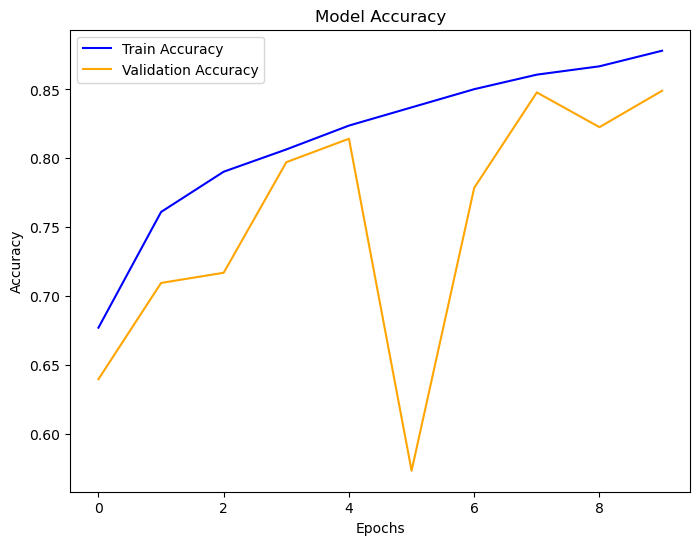

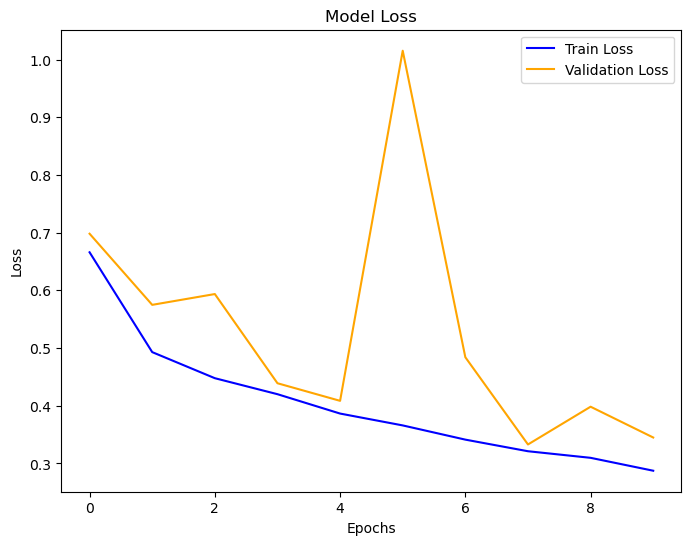

In [34]:
# Plot Results
# Plot Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN Accuracy Graph')
plt.show()

# Plot Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN Loss Graph')
plt.show()

In [8]:
# Evaluate training data
print('Evaluate on train data')
Yhat = model.predict(X_train)
Yhat_class = (Yhat > 0.5).astype(int)
acc = np.mean(Yhat_class.flatten() == Y_train.flatten())
print('The train accuracy rate is: ', acc * 100)

Evaluate on train data
The train accuracy rate is:  90.33


In [10]:
# Evaluate test data
print('Evaluate on test data')
Yhat_test = model.predict(X_test) 
Yhat_test_class = (Yhat_test > 0.5).astype(int)
test_acc = np.mean(Yhat_test_class.flatten() == Y_test.flatten())
print('The test accuracy rate is: ', test_acc * 100)

Evaluate on test data
The test accuracy rate is:  84.89999999999999


In [35]:
ROWS = 64
COLS = 64
CHANNELS = 3

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)  # Read image
    img = cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)  # Resize to match model input
    img = img / 255.0  # Normalize pixel values (0 to 1)
    return img.reshape(1, ROWS, COLS, CHANNELS)  # Reshape for CNN


Prediction: CAT with probability 70.46%


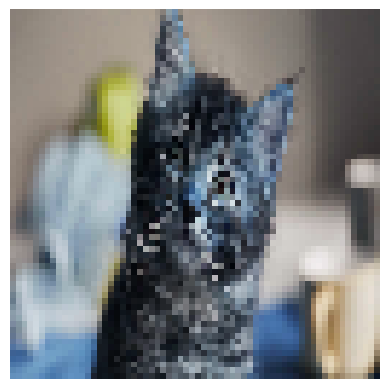

In [36]:
# Predict with test case (Cat)
file = "cat2.jpg"
test_image = read_image(file)  
if test_image.ndim == 2:  # If grayscale, add a channel dimension
    test_image = np.expand_dims(test_image, axis=-1)

# Reshape image to match CNN input format
X_img = test_image.reshape(1, ROWS, COLS, CHANNELS) / 255.0

# Make a prediction
A = model.predict(X_img)

# Interpret the result
if A > 0.5:
    print(f'Prediction: CAT with probability {A[0][0] * 100:.2f}%')
else:
    print(f'Prediction: NOT CAT with probability {(1 - A[0][0]) * 100:.2f}%')

# Display the image with prediction
plt.imshow(test_image.squeeze(), cmap='gray' if test_image.shape[-1] == 1 else None)
plt.axis('off')
plt.show()

Prediction: CAT with probability 68.63%


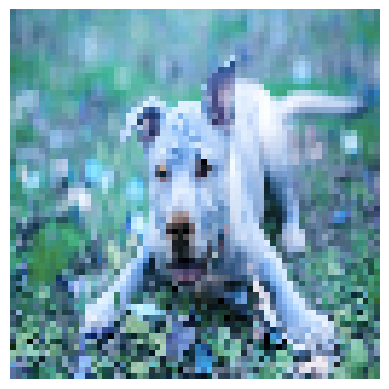

In [38]:
# Predict with test case (Dog)
file = "dog2.jpg"
test_image = read_image(file)  
if test_image.ndim == 2:  # If grayscale, add a channel dimension
    test_image = np.expand_dims(test_image, axis=-1)

# Reshape image to match CNN input format
X_img = test_image.reshape(1, ROWS, COLS, CHANNELS) / 255.0

# Make a prediction
A = model.predict(X_img)

# Interpret the result
if A > 0.5:
    print(f'Prediction: CAT with probability {A[0][0] * 100:.2f}%')
else:
    print(f'Prediction: NOT CAT with probability {(1 - A[0][0]) * 100:.2f}%')

# Display the image with prediction
plt.imshow(test_image.squeeze(), cmap='gray' if test_image.shape[-1] == 1 else None)
plt.axis('off')
plt.show()

# Comparing NN and CNN Models

### NN Accuracy
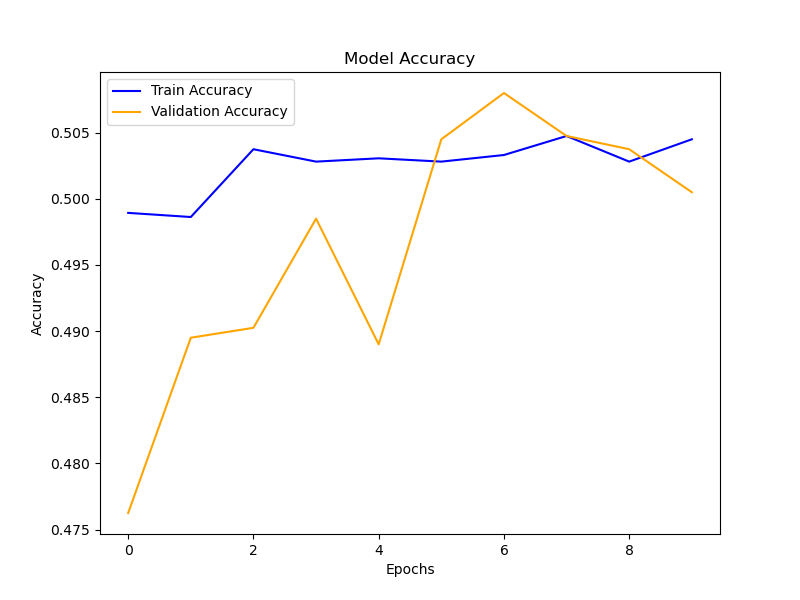

### CNN Accuracy
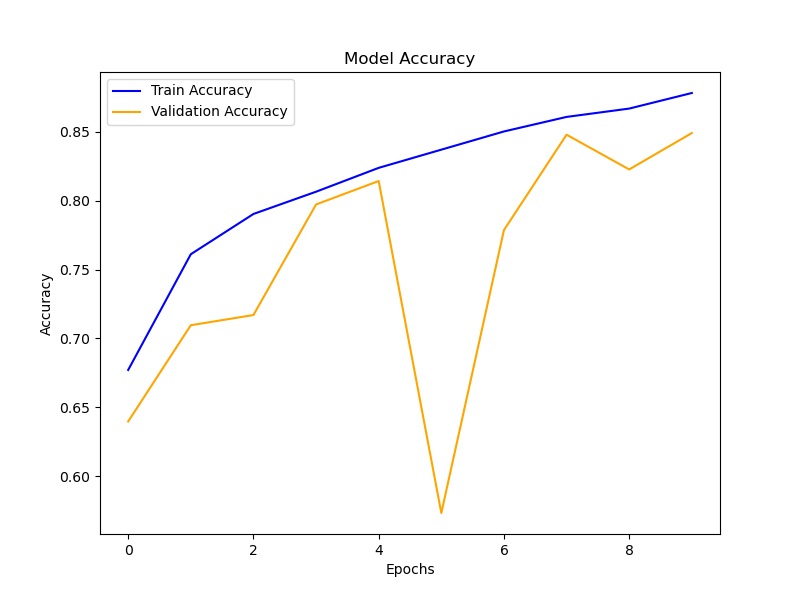

As you can see in the charts, the NN model has a relatively stable train accuracy and rising validation accuracy. The CNN accuracy has a steadily rising train accuracy and, excluding an outlier, relativily stable and parallel validation accuracy.

### NN Loss
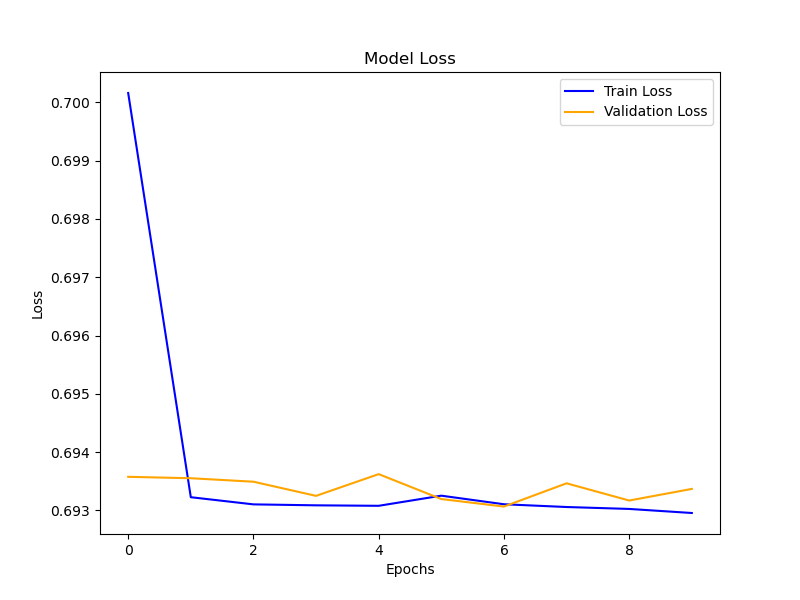

### CNN Loss
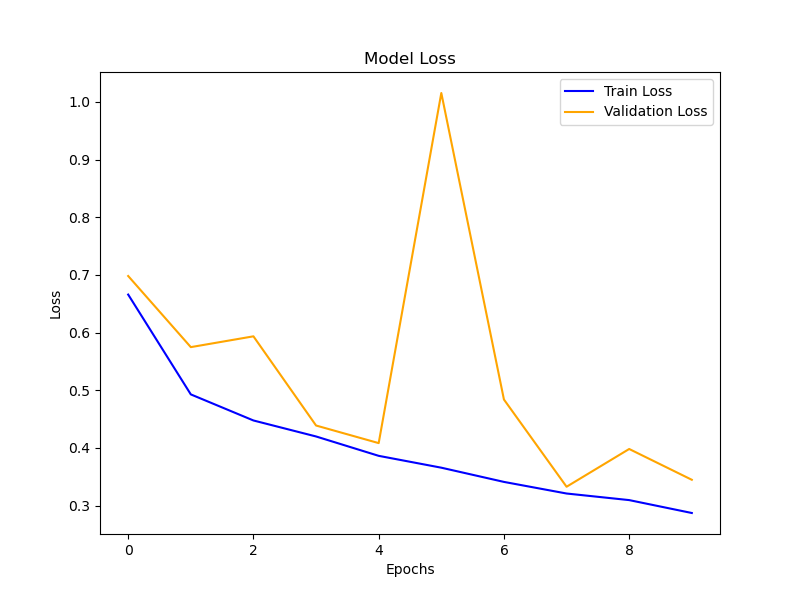

As you can see in the graphs, The NN model has a steep decline in train loss and very stead validation loss. Excluding an outlier, the CNN model has a smoothly decreasing train loss and a parallel validation loss. 

 ### NN Model Hyper Parameters
The NN model has a relatively simple architecture with three dense layers. Two layers use ReLu, while the third uses sigmoid. Each layer has a decreasing amount of units as well, with the first having 32, second having 16, and last having only 1. 

The NN model has a train accuracy of 50.49% and test accuracy of 51.52%.

### CNN Model Hyper Parameters
The CNN model is more complex, with multiple convoluted layers. Each layer has an increasing amount of filters in each layer, with each layer being a 3x3. The first layer has 32 filters, then 64, then 128. The last layer in the model is a Dense layer with 512 neurons in the neural network. 

Each convoluted layer uses ReLu, while the Dense layer uses sigmoid. 

It has a train accuracy of 90.33% and test accuracy of 84.89%. 

## Comparing Observations

Both models ran with 10 epochs. The NN model compiled very quickly, with each epoch taking ~1ms to compile. Although the results were very quick, neither the test or train accuracies were very high. Both accuracies were ~50%, meaning each predicition is essentially a coin toss. 

Because train accuracy and validation loss were both relatively stable, each epoch has minimal effect on training the model. The accuracy did not improve much on each iteration, meaning the model was not very effective. 

The CNN model took much longer to run due to being more complex. Each epoch took ~1 minute to complete, but improved train accuracy while decreasing loss. Even though the CNN model took longer to compile, it was much more effective at producing accurate results and predictions.

In conclusion, the CNN model is much more effective than the NN model due to being more complex and having a more detailed architecture. Even though the CNN model is more effective, it is still not perfect. As seen in the test cases, it still has a ~15% chance of predicting incorrectly, so there is still room for improvement. 

The CNN model is much more accurate that the NN model for both testing and training. 